In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
## Importamos el csv, y mostramos los primeros 5 valores
df = pd.read_csv(('attacks.csv'), encoding = 'ISO-8859-1')
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [9]:
df['Case Number'].duplicated().value_counts()

True     19435
False     6288
Name: Case Number, dtype: int64

In [11]:
### Primera técnica de limpieza
index = []
for i in df[df['Case Number'].duplicated()].index:
    index.append(i)
df = df.drop(index,axis=0)
for i in index:
    df[df['Case Number'][i]] = df[df['Case Number'][i] +" z"]
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [24]:
df.columns.str.replace(" ", "_")
df.columns

Index(['Case Number', 'Date', 'Year', 'Country', 'Area'], dtype='object')

In [12]:
## Comprobamos que no existe ningún duplicado
df.duplicated().sum()

0

In [13]:
df_clean = df.drop(["Unnamed: 22","Unnamed: 23",'pdf','href formula','href',
                    'original order','Case Number.1','Case Number.2',"Time","Investigator or Source"], axis = 1)

In [14]:
###Comprbamos la cantidad de valores nulos que hay
df_clean.isnull().sum()

Case Number       1
Date              2
Year              4
Type              6
Country          52
Area            456
Location        542
Activity        544
Name            211
Sex             566
Age            2823
Injury           30
Fatal (Y/N)     537
Species        2834
dtype: int64

In [15]:
### Intetaremos ver si existe una correlación clara entre el número de ataques, 
### y la temperatura media anual de las aguas donde se producen

### Para ello nos quedamos con las columnas que  nos interesan:

df = df[['Case Number','Date', 'Year', 'Country','Area']]
df.head()

,Case Number,Date,Year,Country,Area
0,2018.06.25,25-Jun-2018,2018.0,USA,California
1,2018.06.18,18-Jun-2018,2018.0,USA,Georgia
2,2018.06.09,09-Jun-2018,2018.0,USA,Hawaii
3,2018.06.08,08-Jun-2018,2018.0,AUSTRALIA,New South Wales
4,2018.06.04,04-Jun-2018,2018.0,MEXICO,Colima


In [16]:
### Ya que en fecha y años hay un número tan bajo de de nulos, los convertiremos todos en 0 para después filtrarlo
df_clean["Year"].fillna(0)

0        2018.0
1        2018.0
2        2018.0
3        2018.0
4        2018.0
          ...  
6299        0.0
6300        0.0
6301        0.0
6302        0.0
25722       0.0
Name: Year, Length: 6288, dtype: float64

In [17]:
df_clean.isnull().sum()

Case Number       1
Date              2
Year              4
Type              6
Country          52
Area            456
Location        542
Activity        544
Name            211
Sex             566
Age            2823
Injury           30
Fatal (Y/N)     537
Species        2834
dtype: int64

In [18]:
### Convertimos el año en un número entero para que no aparezca con decimales
df_clean[['Year']] = df_clean[['Year']].astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [19]:
df_clean.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"


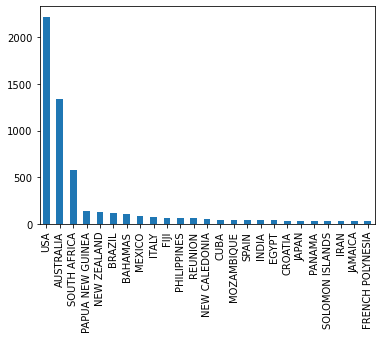

In [20]:
### Nos centraremos en Australia y USA para comprobar la teoría, en concreto en Florida y New south wales.
df_clean["Country"].value_counts().nlargest(25).plot(kind="bar")

In [21]:
df_year = df_clean[(df_clean.Year >= 1978)&(df_clean.Year <= 2016)&(df_clean.Area == 'Florida')]

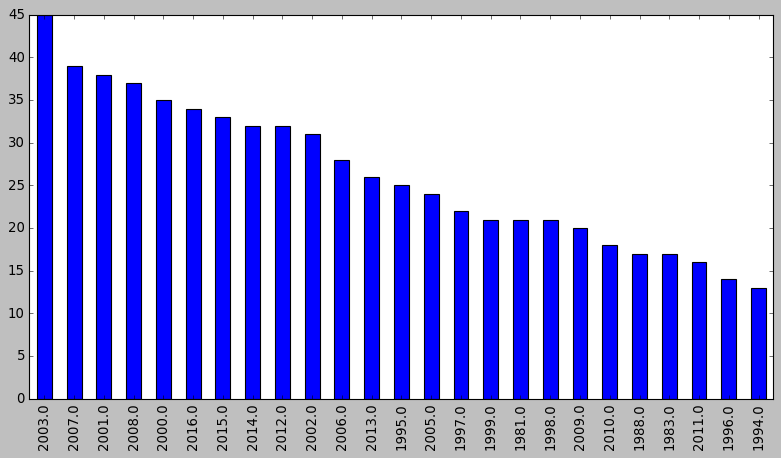

In [22]:
plt.style.use('classic')
plt.rcParams['figure.figsize'] = [12,6]
df_year["Year"].value_counts().nlargest(25).plot(kind="bar")

 
###El año 2015 fue el más caluroso en Costa este de Florida, la temperatura promedio fue: 26℃. 
### 2010 fue el año más frío, la temperatura promedio fue: 23℃.


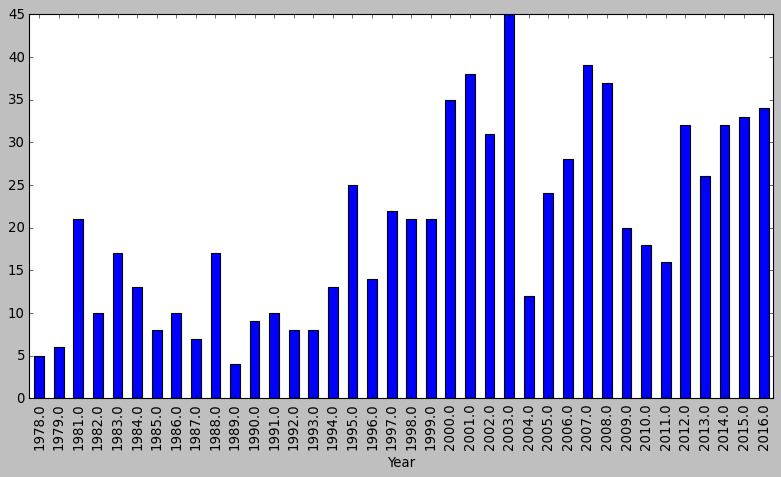

In [23]:
df_year.groupby('Year').size().plot(kind='bar')

In [ ]:
df_year_2 = df_clean[(df_clean.Year >= 1941)&(df_clean.Year <= 1977)&(df_clean.Area == 'Florida')]

In [ ]:
df_year_2.groupby('Year').size().plot(kind='bar')

In [ ]:
hight_temp = pd.DataFrame({'Year':[1941, 1948, 1957, 1959, 2000, 2002, 2003, 2007, 2013, 2015], 
                           'Temperature':[28.5, 29, 28, 28, 28.5, 29.2, 29, 28.5, 28.5, 28.5]})
hight_temp

In [ ]:
month_steps = hight_temp["Temperature"]
weekday_steps = hight_temp["Year"]
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))

plt.sca(ax[0])
month_steps.plot(kind = 'bar')
plt.xlabel("Month")
plt.ylabel("Step median")
plt.title("Step per month")
plt.xticks(range(10),['1941','1948','1957','1959','2000','2002','2003','2007','2013','2015'], rotation=20)

In [ ]:
hight_temp.plot(kind = 'bar',width=0.8 ,subplots=True, figsize=(5,10));

In [ ]:
df_year

In [ ]:
df_year

In [ ]:
low_temp = pd.DataFrame({'Year':[1928, 1935, 1950, 1976, 1977, 1979, 1984, 1988, 2004, 2010], 
                           'Temperature':[26, 26, 26.5, 26, 26.5, 26.5, 26.5, 26.5, 27, 26.5]})
low_temp

In [ ]:
total_temp = pd.DataFrame({'Year':[1928, 1935, 1950, 1976, 1977, 1979, 1984, 1988, 2004, 2010, 1941, 1948, 1957, 1959, 2000, 2002, 2003, 2007, 2013, 2015], 
                           'Temperature':[26, 26, 26.5, 26, 26.5, 26.5, 26.5, 26.5, 27, 26.5, 28.5, 29, 28, 28, 28.5, 29.2, 29, 28.5, 28.5, 28.5]})

#### Esta es una grafica de la temperatura media del mar de tasmania; mar que baña las costas de New South Wales

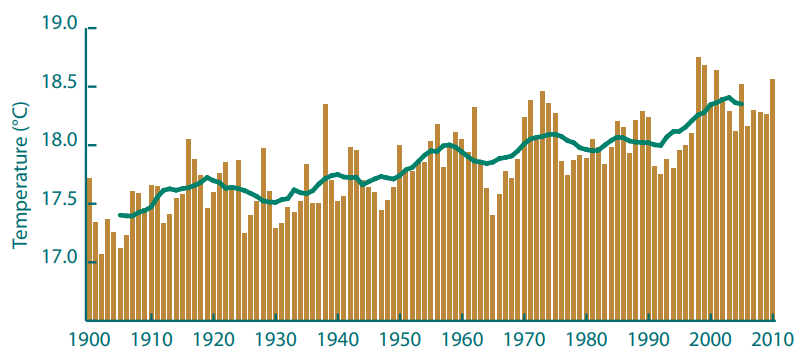

In [ ]:
df_aus = df_clean[(df_clean.Year >= 1938)&(df_clean.Year <= 1960)&(df_clean.Area == 'New South Wales')]

In [ ]:
df_aus.groupby('Year').size().plot(kind='bar')

In [ ]:
plt.style.use('classic')
plt.rcParams['figure.figsize'] = [12,6]
df_aus["Year"].value_counts().nlargest(25).plot(kind="bar")